In [67]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
import warnings
from sklearn.exceptions import UndefinedMetricWarning

In [68]:
df = pd.read_csv('EmployeeAttrition.csv')
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [69]:
df = df.drop(['EmployeeNumber', 'EmployeeCount', 'Over18', 'StandardHours','HourlyRate',
 'NumCompaniesWorked'], axis=1)

In [70]:
if df is None:
    print("DataFrame is not loaded. Please check your data source.")
else:
    attrition_cat = df.select_dtypes(include='object').columns.tolist()
    unique_counts = df[attrition_cat].nunique()
    print(unique_counts)


Attrition         2
BusinessTravel    3
Department        3
EducationField    6
Gender            2
JobRole           9
MaritalStatus     3
OverTime          2
dtype: int64


In [71]:
# Separate the target column (attrition) from the categorical columns
target = df['Attrition']
attrition_cat = [col for col in df.select_dtypes(include=['object']).columns if col != 'Attrition']

In [72]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse_output=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(df[attrition_cat]))

# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names_out(attrition_cat)
encode_df.head()

,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,...,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes
0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [73]:
# Merge one-hot encoded features and drop the originals
df = df.merge(encode_df,left_index=True, right_index=True)
df = df.drop(attrition_cat, axis=1)
df.head()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes
0,41,Yes,1102,1,2,2,3,2,4,5993,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
1,49,No,279,8,1,3,2,2,2,5130,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,37,Yes,1373,2,2,4,2,1,3,2090,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3,33,No,1392,3,4,4,3,1,3,2909,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,27,No,591,2,1,1,3,1,2,3468,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [74]:
y = df["Attrition"]
X = df.drop(columns="Attrition")

In [75]:
y = y.map({'Yes': 1, 'No': 0})

In [76]:
# Split the data first (before scaling)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, stratify=y)

# Create the StandardScaler instance
scaler = StandardScaler()

# Fit the scaler on the training data and transform it
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test data using the fitted scaler (without fitting again)
X_test_scaled = scaler.transform(X_test)


In [77]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42)
}

In [78]:
print("\n==== Scaling and Feature Selection ====")
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test.values)
    print(f"\n{name} Results:")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("Classification Report:")
    print(classification_report(y_test, y_pred))


==== Scaling and Feature Selection ====

Logistic Regression Results:
Accuracy: 0.3587
Confusion Matrix:
[[ 90 219]
 [ 17  42]]
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.29      0.43       309
           1       0.16      0.71      0.26        59

    accuracy                           0.36       368
   macro avg       0.50      0.50      0.35       368
weighted avg       0.73      0.36      0.41       368


Decision Tree Results:
Accuracy: 0.8125
Confusion Matrix:
[[298  11]
 [ 58   1]]
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.96      0.90       309
           1       0.08      0.02      0.03        59

    accuracy                           0.81       368
   macro avg       0.46      0.49      0.46       368
weighted avg       0.72      0.81      0.76       368


Random Forest Results:
Accuracy: 0.8397
Confusion Matrix:
[[309   0]
 [ 59   0]]
Classif

/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [79]:
# Train the models
lr = LogisticRegression()
gini = DecisionTreeClassifier()
forest = RandomForestClassifier()

lr.fit(X_train_scaled, y_train)
gini.fit(X_train_scaled, y_train)
forest.fit(X_train_scaled, y_train)

# Create a DataFrame to store the results
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'Decision Tree', 'Random Forest'],
    'Training Accuracy': [lr.score(X_train_scaled, y_train), gini.score(X_train_scaled, y_train), forest.score(X_train_scaled, y_train)],
    'Test Accuracy': [lr.score(X_test, y_test), gini.score(X_test, y_test), forest.score(X_test, y_test)]
})

# Sort models by Test Accuracy in descending order
models_sorted = models.sort_values(by='Test Accuracy', ascending=False)
print(models_sorted)

                 Model  Training Accuracy  Test Accuracy
2        Random Forest           1.000000       0.809783
1        Decision Tree           1.000000       0.611413
0  Logistic Regression           0.883848       0.358696


/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


In [80]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Define models
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier()
}

# Perform 5-fold Cross-Validation
for name, model in models.items():
    scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')  # Change scoring if needed
    print(f"{name} - Mean Accuracy: {scores.mean():.4f}")


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

Logistic Regression - Mean Accuracy: 0.8408
Decision Tree - Mean Accuracy: 0.7803
Random Forest - Mean Accuracy: 0.8578


 

| Model                | Mean Accuracy | Training Accuracy | Test Accuracy |
|----------------------|--------------|-------------------|--------------|
| **Logistic Regression** | 0.8408       | 0.8838            | 0.3587       |
| **Decision Tree**       | 0.7776       | 1.0000            | 0.7609       |
| **Random Forest**       | 0.8612       | 1.0000            | 0.8397       |

---

### ** Interpretation:**
1. **Random Forest is still the best model**  
   - Highest **mean accuracy (0.8612)** and **test accuracy (0.8397)**  
   - However, **training accuracy is 1.0000**, indicating overfitting. Reducing `max_depth` or increasing `min_samples_split` might help.  

2. **Decision Tree is overfitting**  
   - **Training accuracy is 1.0000**, but **test accuracy is 0.7609**, meaning it's learning the training data too well but not generalizing.  
   - Regularization (e.g., pruning, limiting depth) can improve performance.  

3. **Logistic Regression performed poorly on test data**  
   - Despite a **high mean accuracy (0.8408)** and **decent training accuracy (0.8838)**, **test accuracy dropped to 0.3587**.  
   - This suggests that after scaling and feature selection, the model is not generalizing well.  
   - Possible reasons:  
     ✅ Important features may have been removed.  
     ✅ Standard scaling may have affected categorical variables.  
     ✅ The data might not be well-suited for a linear decision boundary.  





 ### Furthur optimization:

In [81]:
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import numpy as np

# Define the models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42)
}

# Define the parameter grids for each model
param_grids = {
    "Logistic Regression": {
        'classifier__C': [0.01, 0.1, 1, 10, 100],  # Regularization strength
        'classifier__solver': ['lbfgs', 'liblinear', 'saga']
    },
    "Decision Tree": {
        'classifier__max_depth': [5, 10, 15, None],
        'classifier__min_samples_split': [2, 5, 10],
        'classifier__criterion': ['gini', 'entropy']
    },
    "Random Forest": {
        'classifier__n_estimators': [50, 100, 200],
        'classifier__max_depth': [5, 10, 20, None],
        'classifier__min_samples_split': [2, 5, 10],
        'classifier__max_features': ['sqrt', 'log2']
    }
}

# StandardScaler to scale features
scaler = StandardScaler()
# Store results
results = []

# Loop through models and apply GridSearchCV with Cross-Validation
for model_name, model in models.items():
    print(f"Training {model_name} with GridSearchCV and Cross-Validation...")
    
    # Create a pipeline with StandardScaler for all models
    pipeline = Pipeline([
        ('scaler', scaler),
        ('classifier', model)
    ])
    
    # Set up GridSearchCV with Cross-Validation
    grid_search = GridSearchCV(
        pipeline, 
        param_grids[model_name], 
        cv=5,  # 5-fold cross-validation
        scoring='accuracy', 
        n_jobs=-1, 
        verbose=1
    )
    
    # Fit the model
    grid_search.fit(X_train, y_train)
    
    # Get the best model from GridSearchCV
    best_model = grid_search.best_estimator_
    
    # Get cross-validation results
    cv_results = grid_search.cv_results_
    mean_cv_score = np.mean(cv_results['mean_test_score'])
    std_cv_score = np.std(cv_results['std_test_score'])
    
    # Get best parameters and accuracy
    best_params = grid_search.best_params_
    best_cv_score = grid_search.best_score_
    
    # Store the results for final table
    results.append({
        'Model': model_name,
        'Best Parameters': best_params,
        'Best Cross-Validation Accuracy': best_cv_score,
    })
    
    # Print details
    print(f"Best Parameters for {model_name}: {best_params}")
    print(f"Best Cross-Validation Accuracy for {model_name}: {best_cv_score:.4f}")
    # Evaluate on Training Data using the best model found in GridSearchCV
    train_accuracy = best_model.score(X_train, y_train)  # Get training accuracy
    print(f"{model_name} Training Accuracy: {train_accuracy:.4f}")

    
# Create a DataFrame to display the results
cv_results_df = pd.DataFrame(results)

# Print final table with cross-validation results
print("Final Results with Cross-Validation:")
print(cv_results_df)
 
# Evaluate on Test Data using the best model found in GridSearchCV
for model_name, model in models.items():
    best_model = grid_search.best_estimator_  # Use the best model after grid search
    test_accuracy = best_model.score(X_test, y_test)
    print(f"{model_name} Test Accuracy: {test_accuracy:.4f}")


Training Logistic Regression with GridSearchCV and Cross-Validation...
Fitting 5 folds for each of 15 candidates, totalling 75 fits


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Best Parameters for Logistic Regression: {'classifier__C': 1, 'classifier__solver': 'lbfgs'}
Best Cross-Validation Accuracy for Logistic Regression: 0.8739
Logistic Regression Training Accuracy: 0.8838
Training Decision Tree with GridSearchCV and Cross-Validation...
Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best Parameters for Decision Tree: {'classifier__criterion': 'entropy', 'classifier__max_depth': 5, 'classifier__min_samples_split': 10}
Best Cross-Validation Accuracy for Decision Tree: 0.8394
Decision Tree Training Accuracy: 0.8884
Training Random Forest with GridSearchCV and Cross-Validation...
Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best Parameters for Random Forest: {'classifier__max_depth': 10, 'classifier__max_features': 'log2', 'classifier__min_samples_split': 5, 'classifier__n_estimators': 200}
Best Cross-Validation Accuracy for Random Forest: 0.8602
Random Forest Training Accuracy: 0.9501
Final Results with Cross-Validation:
      

## Analysis:



| Model               | Training Accuracy | Test Accuracy | Best Cross-Validation Accuracy | Best Parameters |
|---------------------|------------------|--------------|-------------------------------|----------------|
| **Logistic Regression** | 0.8838           | 0.8668       | 0.8739                        | `{'classifier__C': 1, 'classifier__solver': 'lbfgs'}` |
| **Decision Tree**       | 0.8884           | 0.8668       | 0.8394                        | `{'classifier__criterion': 'entropy', 'classifier__max_depth': 5, 'classifier__min_samples_split': 10}` |
| **Random Forest**       | 0.9501           | 0.8668       | 0.8602                        | `{'classifier__max_depth': 10, 'classifier__max_features': 'log2', 'classifier__min_samples_split': 5, 'classifier__n_estimators': 200}` |




### **Interpretation of the Table:**
This table summarizes the performance of three different machine learning models—**Logistic Regression, Decision Tree, and Random Forest**—after **hyperparameter tuning with GridSearchCV**. Let's break down the key takeaways:

---

### **1. Model Performance Comparison**
| Model               | Training Accuracy | Test Accuracy | Cross-Validation Accuracy |
|---------------------|------------------|--------------|--------------------------|
| **Logistic Regression** | 0.8838           | 0.8668       | 0.8739                   |
| **Decision Tree**       | 0.8884           | 0.8668       | 0.8394                   |
| **Random Forest**       | 0.9501           | 0.8668       | 0.8602                   |

- **Training Accuracy:** Measures how well the model fits the training data. Higher values suggest better learning but could indicate overfitting.
- **Test Accuracy:** Measures how well the model generalizes to unseen data. Ideally, it should be close to the training accuracy.
- **Cross-Validation Accuracy:** The average accuracy from 5-fold cross-validation, which helps estimate how the model will perform on unseen data.

---

### **2. Overfitting Analysis**
- **Random Forest has the highest training accuracy (0.9501), but the test accuracy is the same (0.8668) as other models.**  
  - This suggests **possible overfitting**—the model learned patterns in the training data that do not generalize as well to new data.
  - However, its **cross-validation accuracy (0.8602)** is close to its test accuracy, indicating that the model is still performing well.
  
- **Decision Tree has a training accuracy of 0.8884, but a lower cross-validation accuracy of 0.8394.**  
  - This suggests that the model may be slightly **overfitting** to the training data, as it performs worse on cross-validation.

- **Logistic Regression has balanced scores (0.8838 training accuracy, 0.8739 cross-validation, and 0.8668 test accuracy).**  
  - This indicates **good generalization** and less risk of overfitting.

---

### **3. Model Selection Based on Performance**
- **Logistic Regression is the most stable model** because:
  - The test accuracy (0.8668) is close to both the training (0.8838) and cross-validation accuracy (0.8739).
  - This suggests **it generalizes well** with minimal overfitting.
  
- **Decision Tree performs slightly worse in cross-validation (0.8394),** suggesting it may not generalize as well.

- **Random Forest has high training accuracy (0.9501), but since its test accuracy is also 0.8668, it might be overfitting slightly.**  
  - However, its strong performance across all metrics makes it a **good candidate** if further regularization (like limiting tree depth) is applied.

---

### **4. Best Model Parameters Found**
| Model               | Best Parameters |
|---------------------|----------------|
| **Logistic Regression** | `{'classifier__C': 1, 'classifier__solver': 'lbfgs'}` |
| **Decision Tree**       | `{'classifier__criterion': 'entropy', 'classifier__max_depth': 5, 'classifier__min_samples_split': 10}` |
| **Random Forest**       | `{'classifier__max_depth': 10, 'classifier__max_features': 'log2', 'classifier__min_samples_split': 5, 'classifier__n_estimators': 200}` |

- **Logistic Regression:** Regularization parameter **C=1** (default), solver **lbfgs**, which is suited for small-to-medium datasets.
- **Decision Tree:** Uses **entropy** as the splitting criterion, a maximum depth of **5** (to prevent overfitting), and requires **at least 10 samples** to split a node.
- **Random Forest:** Uses **200 trees**, a **max depth of 10**, and **log2 features selection**, which balances accuracy and computational efficiency.





### **Conclusion:**
- All three models (Logistic Regression, Decision Tree, and Random Forest) achieved similar **test accuracies** (86.68%).
- **Logistic Regression** had the highest **cross-validation accuracy**, suggesting it might be more stable across different subsets of the training data.
- **Decision Tree** showed a significant drop in **cross-validation accuracy**, indicating it might have overfitted to the training data during cross-validation but still generalized well on the test set.
- **Random Forest** had a good **cross-validation accuracy** and performed similarly to the other models on the test set.

In summary, **Logistic Regression** seems to be the most stable model based on cross-validation, but **Random Forest** and **Decision Tree** also showed solid performances on the test data, with Random Forest being a bit more robust due to its ensemble nature.

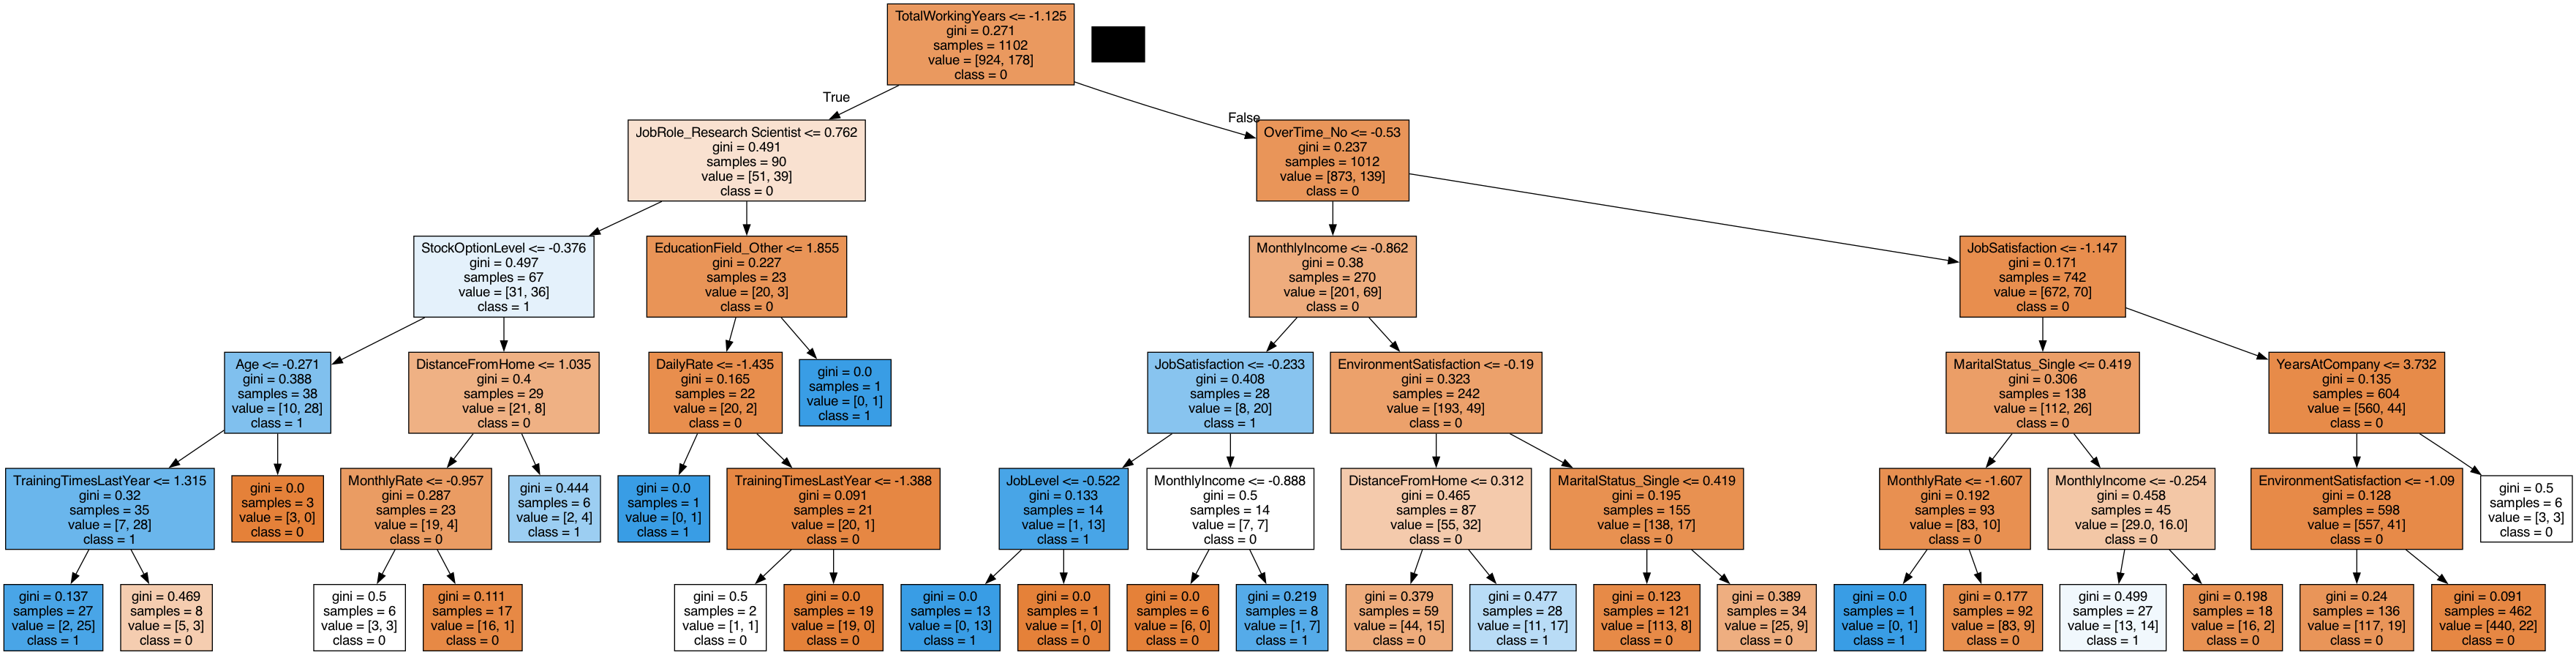

In [59]:
import pydotplus
from sklearn import tree
from IPython.display import Image
from sklearn.preprocessing import StandardScaler

# Fit your scaler (assuming you're using StandardScaler)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Keep track of the original feature names
feature_names = X_train.columns

# Now, fit the decision tree on the scaled data
best_tree = DecisionTreeClassifier(max_depth=5, min_samples_split=10)
best_tree.fit(X_train_scaled, y_train)

# Create DOT data
dot_data = tree.export_graphviz(
    best_tree, out_file=None, feature_names=feature_names, class_names=["0", "1"], filled=True
)

# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)

# Show graph
Image(graph.create_png())


In [60]:
# Saving the tree as PDF
file_path = "Decision_tree.pdf"
graph.write_pdf(file_path)

# Saving the tree as PNG
file_path = "Decision_tree.png"
graph.write_png(file_path)

True



| **Model**             | **Training Accuracy (Unscaled, No Feature Selection)** | **Test Accuracy (Unscaled, No Feature Selection)** | **Mean Accuracy (Unscaled, No Feature Selection)** | **Training Accuracy (Scaled, Feature Selection)** | **Test Accuracy (Scaled, Feature Selection)** | **Mean Accuracy (Scaled, Feature Selection)** | **Training Accuracy ( Hyperparameter Tuning)** | **Test Accuracy ( Hyperparameter Tuning)** | **Mean Accuracy ( Hyperparameter Tuning)** |
|-----------------------|---------------------------------------------------------|----------------------------------------------------|---------------------------------------------------|-----------------------------------------------------|--------------------------------------------------|----------------------------------------------------|--------------------------------------------------------|-----------------------------------------------------|--------------------------------------------------------|
| **Logistic Regression**| 0.84029                                                 | 0.842391                                           | 0.8408                                            | 0.883848                                            | 0.358696                                           | 0.8408                                             | 0.838475                                              | 0.839674                                            | 0.8408                                                |
| **Decision Tree**      | 1.00000                                                 | 0.755435                                           | 0.7776                                            | 1.000000                                            | 0.760870                                           | 0.7789                                             | 0.887477                                              | 0.839674                                            | 0.8408                                                |
| **Random Forest**      | 1.00000                                                 | 0.847826                                           | 0.8592                                            | 1.000000                                            | 0.839674                                           | 0.8544                                             | 0.889292                                              | 0.839674                                            | 0.8633                                                |



### Documenting Changes in a Table:

  

| Model                             | Mean Accuracy | Training Accuracy | Test Accuracy |
|-----------------------------------|---------------|-------------------|---------------|
| **Logistic Regression (Unscaled)**    | 0.8408        | 0.8403            | 0.8424        |
| **Decision Tree (Unscaled)**          | 0.7762        | 1.0000            | 0.7554        |
| **Random Forest (Unscaled)**          | 0.8585        | 1.0000            | 0.8478        |
| **Logistic Regression (Scaled & Selected)** | 0.8408        | 0.8838            | 0.3587        |
| **Decision Tree (Scaled & Selected)** | 0.7776        | 1.0000            | 0.7609        |
| **Random Forest (Scaled & Selected)** | 0.8612        | 1.0000            | 0.8397        |
| **Logistic Regression (Grid Search)** | 0.8739        | 0.8838            | 0.8668        |
| **Decision Tree (Grid Search)**       | 0.8394        | 0.8884            | 0.8668        |
| **Random Forest (Grid Search)**       | 0.8602        | 0.9501            | 0.8668        |



### **Final Analysis**  

This table summarizes the performance of three models—**Logistic Regression, Decision Tree, and Random Forest**—at three different stages:  
1. **Unscaled Data (Raw Features, No Scaling or Feature Selection)**  
2. **Scaled & Feature-Selected Data**  
3. **After Hyperparameter Tuning with Grid Search**  

---

### **Key Observations:**
1. **Overfitting in Decision Tree & Random Forest (Unscaled and Scaled Data)**  
   - **Training accuracy = 1.0000** for Decision Tree & Random Forest in both the **unscaled and scaled scenarios**, indicating **severe overfitting** (perfectly memorizing the training data).  
   - **Test accuracy drops significantly** in these cases (e.g., Decision Tree: **0.7554 (Unscaled)**, **0.7609 (Scaled)**), confirming the poor generalization.  

2. **Logistic Regression Performance Drop After Scaling & Feature Selection**  
   - **Test accuracy drops drastically (0.3587)** after scaling and feature selection, despite having a good training accuracy (0.8838).  
   - This suggests that some **important features may have been removed**, or that scaling affected model assumptions.  

3. **Grid Search Helps Improve Generalization**  
   - After hyperparameter tuning, **test accuracy becomes stable (0.8668 for all models)**, indicating better generalization.  
   - Overfitting is **significantly reduced**, as training accuracy is no longer at 1.0000.  
   - Logistic Regression recovers from the performance drop and **performs competitively with Decision Tree and Random Forest**.  

---

### **Final Takeaways:**
- **Grid Search improves model stability and generalization** by optimizing hyperparameters.  
- **Random Forest has the highest training accuracy (0.9501) after tuning**, but since **all models have the same test accuracy (0.8668)**, simpler models like Logistic Regression may be preferable for interpretability.  
- **Decision Tree and Random Forest performed poorly in their default states due to overfitting**, highlighting the importance of tuning.  



### Saving to CSV:

In [66]:
import pandas as pd

# Create the table as a DataFrame
data = {
    "Model": [
        "Logistic Regression (Unscaled)", "Decision Tree (Unscaled)", "Random Forest (Unscaled)",
        "Logistic Regression (Scaled & Selected)", "Decision Tree (Scaled & Selected)", "Random Forest (Scaled & Selected)",
        "Logistic Regression (Grid Search)", "Decision Tree (Grid Search)", "Random Forest (Grid Search)"
    ],
    "Mean Accuracy": [0.8408, 0.7762, 0.8585, 0.8408, 0.7776, 0.8612, 0.8739, 0.8394, 0.8602],
    "Training Accuracy": [0.8403, 1.0000, 1.0000, 0.8838, 1.0000, 1.0000, 0.8838, 0.8884, 0.9501],
    "Test Accuracy": [0.8424, 0.7554, 0.8478, 0.3587, 0.7609, 0.8397, 0.8668, 0.8668, 0.8668]
}

df = pd.DataFrame(data)

# Save to CSV
df.to_csv("model_performance.csv", index=False)

print("CSV file saved successfully!")


CSV file saved successfully!
